In [1]:
# Import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
# Read files into DataFrame
path_conflict = Path("Resources/conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("Resources/net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("Resources/population(1).csv")
population_df = pd.read_csv(path_population)

In [3]:
# Preview Data Sets
conflict_df.head()
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [4]:
migration_df.head()

,Country name,Year,Net migration
0,Afghanistan,1950,6161.0
1,Afghanistan,1951,4903.0
2,Afghanistan,1952,145.0
3,Afghanistan,1953,-8867.0
4,Afghanistan,1954,-6837.0


In [5]:
population_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [6]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [7]:
conflict_df.head()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0


In [8]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [9]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [10]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [11]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0.0,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN


In [12]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0.0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN,NaN


In [13]:
# Remove any NaNs from the dataset.
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,AFG,1989,5411.0,2683.0,10673172.0
74,Afghanistan,AFG,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,AFG,1991,3553.0,39926.0,10745168.0
76,Afghanistan,AFG,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,AFG,1993,4097.0,1171818.0,14003764.0


In [14]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,1989,5411.0,2683.0,10673172.0
74,Afghanistan,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,1991,3553.0,39926.0,10745168.0
76,Afghanistan,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [15]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [16]:
# Copy merged df for different analysis
merged_copy_df = merged_df.copy()

In [17]:
# Remove all countries except for one
country_name = "Eritrea"
eritrea_df = merged_df[merged_df['Country name'] == country_name]
eritrea_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
1815,Eritrea,1989,6602.0,-7336.0,2102135.0
1816,Eritrea,1990,30702.0,-12442.0,2149967.0
1817,Eritrea,1991,6042.0,-328546.0,2039225.0
1818,Eritrea,1992,0.0,-22331.0,1921162.0
1819,Eritrea,1993,0.0,33686.0,1981424.0


In [18]:
# Reset Index
eritrea_df.reset_index(drop=True, inplace=True)
eritrea_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Eritrea,1989,6602.0,-7336.0,2102135.0
1,Eritrea,1990,30702.0,-12442.0,2149967.0
2,Eritrea,1991,6042.0,-328546.0,2039225.0
3,Eritrea,1992,0.0,-22331.0,1921162.0
4,Eritrea,1993,0.0,33686.0,1981424.0


In [19]:
eritrea_df

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Eritrea,1989,6602.0,-7336.000,2102135.0
1,Eritrea,1990,30702.0,-12442.000,2149967.0
2,Eritrea,1991,6042.0,-328546.000,2039225.0
3,Eritrea,1992,0.0,-22331.000,1921162.0
4,Eritrea,1993,0.0,33686.000,1981424.0
5,Eritrea,1994,0.0,-25840.000,2042501.0
6,Eritrea,1995,0.0,136103.000,2157227.0
7,Eritrea,1996,50.0,-52425.000,2264083.0
8,Eritrea,1997,31.0,-30772.000,2291571.0
9,Eritrea,1998,842.0,-32002.998,2322761.0


In [20]:
# Drop Country Name and rename df
eritrea_df.drop(["Country name"], axis=1, inplace=True)


C:\Users\William Frescas\AppData\Local\Temp\ipykernel_41508\1988669348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eritrea_df.drop(["Country name"], axis=1, inplace=True)


In [21]:
def millions(x, pos):
    return f"{x*1e-6:1.1f}M"

In [22]:
def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

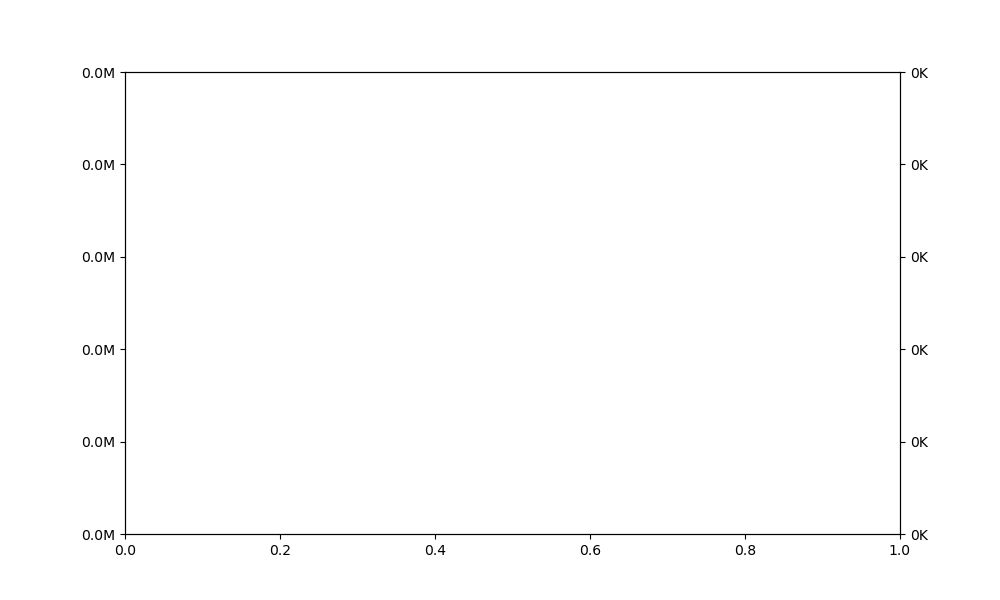

In [23]:
# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  

# ax2.set_ylim(-3000, 80000)
# ax1.set_ylim(-5000000, 30000000)

ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)


In [24]:
# Plot Conclicts
ax2.plot(eritrea_df.Year, eritrea_df.total_conflict_deaths, label="Conflict Deaths", color="red")

In [25]:
# Plot Population
ax1.plot(eritrea_df.Year, eritrea_df.Population, label="Population", color="blue")

In [26]:
# Plot Migration
ax1.plot(eritrea_df.Year, eritrea_df["Net migration"], label="Net migration", color="green")

In [27]:
# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('Number Migrating & Population')
plt.ylabel('Number of Deaths')
plt.title("Eritrea: Conflict's Effect on Pop & Migration")
ax2.grid(True)
#ax1.grid(True)
ax1.legend(loc="upper center")
ax2.legend(loc="best")

In [28]:
# Add new column calculating the percent of the population change over time.
eritrea_df["pop_pct_change"] =  eritrea_df.Population.pct_change()

C:\Users\William Frescas\AppData\Local\Temp\ipykernel_41508\3775733935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eritrea_df["pop_pct_change"] =  eritrea_df.Population.pct_change()


In [29]:
# Clean up the headers for a clean display.
eritrea_df.columns = ["Year", "Conflict Deaths", "Net Migration", "Population", "Population % Change"]

In [30]:
# Identify which columns to display for correlation analysis.
coluns_to_display = ["Conflict Deaths", "Net Migration", "Population", "Population % Change"]

In [31]:
# Perform the correlation function on the df.
eritrea_df[coluns_to_display].corr()

,Conflict Deaths,Net Migration,Population,Population % Change
Conflict Deaths,1.000000,-0.034541,-0.306223,-0.054060
Net Migration,-0.034541,1.000000,-0.022119,0.684506
Population,-0.306223,-0.022119,1.000000,0.060116
Population % Change,-0.054060,0.684506,0.060116,1.000000
